In [1]:
!pip install python-Levenshtein matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.7 MB/s eta 0:00:00


In [2]:
from Levenshtein import distance as lev, jaro, jaro_winkler
from itertools import combinations, product
import re
import matplotlib.pyplot as plt

In [4]:
def preprocess(text):
    sentences = re.split(r'[.!?]', text)
    fragments = []
    for s in sentences:
        words = re.sub(r'[^\w\s]', '', s).lower().split()
        fragments.extend([' '.join(words[i:i+n])
                         for n in range(1, 6)
                         for i in range(len(words)-n+1)])
    return [f for f in fragments if f]

In [5]:
def calculate_metrics(str1, str2):
    return {
        'levenshtein': lev(str1, str2),
        'jaro': jaro(str1, str2),
        'jaro_winkler': jaro_winkler(str1, str2),
        'jaccard': len(set(str1.split()) & set(str2.split())) /
                   len(set(str1.split()) | set(str2.split()))
    }

In [14]:
def compare_texts(frag1, frag2, lev_thresh,  jaro_thresh,  jw_thresh, jaccard_thresh):
    matches_lev = set()
    matches_jaro = set()
    matches_jw = set()
    matches_jc = set()
    for a, b in product(frag1, frag2):
        metrics = calculate_metrics(a, b)
        if metrics['levenshtein'] <= lev_thresh:
            matches_lev.add((a, b, metrics['levenshtein']))
        if metrics['jaro'] >= jaro_thresh:
            matches_jaro.add((a, b, metrics['jaro']))
        if metrics['jaro_winkler'] >= jw_thresh:
            matches_jw.add((a, b, metrics['jaro']))
        if metrics['jaccard'] >= jaccard_thresh:
            matches_jc.add((a, b, metrics['jaccard']))
    res = {'levenshtein': (sum(len(x[0]) for x in matches_lev), max(len(x[0]) for x in matches_lev)),
           'jaro': (sum(len(x[0]) for x in matches_jaro), max(len(x[0]) for x in matches_jaro)),
           'jaro_winkler': (sum(len(x[0]) for x in matches_jw), max(len(x[0]) for x in matches_jw)),
           'jaccard': (sum(len(x[0]) for x in matches_jc), max(len(x[0]) for x in matches_jc))}
    return res

In [15]:
with open('hameleon.txt', 'r', encoding='utf-8') as f1, \
     open('hameleon_short.txt', 'r', encoding='utf-8') as f2:
    text1, text2 = f1.read(), f2.read()

In [16]:
frag1, frag2 = preprocess(text1), preprocess(text2)

In [17]:
print(frag1)
print(frag2)

['через', 'базарную', 'площадь', 'идет', 'полицейский', 'надзиратель', 'очумелов', 'в', 'новой', 'шинели', 'и', 'с', 'узелком', 'в', 'руке', 'через базарную', 'базарную площадь', 'площадь идет', 'идет полицейский', 'полицейский надзиратель', 'надзиратель очумелов', 'очумелов в', 'в новой', 'новой шинели', 'шинели и', 'и с', 'с узелком', 'узелком в', 'в руке', 'через базарную площадь', 'базарную площадь идет', 'площадь идет полицейский', 'идет полицейский надзиратель', 'полицейский надзиратель очумелов', 'надзиратель очумелов в', 'очумелов в новой', 'в новой шинели', 'новой шинели и', 'шинели и с', 'и с узелком', 'с узелком в', 'узелком в руке', 'через базарную площадь идет', 'базарную площадь идет полицейский', 'площадь идет полицейский надзиратель', 'идет полицейский надзиратель очумелов', 'полицейский надзиратель очумелов в', 'надзиратель очумелов в новой', 'очумелов в новой шинели', 'в новой шинели и', 'новой шинели и с', 'шинели и с узелком', 'и с узелком в', 'с узелком в руке', 'ч

In [21]:
methods = ['levenshtein', 'jaro', 'jaro_winkler', 'jaccard']
data = []
for i in range(11):
    data.append(compare_texts(frag1, frag2, i, i*0.1, i*0.1, i*0.1))

In [22]:
data

[{'levenshtein': (288, 32),
  'jaro': (48419679, 54),
  'jaro_winkler': (48419679, 54),
  'jaccard': (48419679, 54)},
 {'levenshtein': (682, 32),
  'jaro': (47543158, 54),
  'jaro_winkler': (47543158, 54),
  'jaccard': (2386934, 45)},
 {'levenshtein': (3272, 34),
  'jaro': (47543158, 54),
  'jaro_winkler': (47543158, 54),
  'jaccard': (483877, 45)},
 {'levenshtein': (14085, 34),
  'jaro': (47159390, 54),
  'jaro_winkler': (47159390, 54),
  'jaccard': (54959, 45)},
 {'levenshtein': (51245, 37),
  'jaro': (44057956, 54),
  'jaro_winkler': (44057956, 54),
  'jaccard': (11158, 45)},
 {'levenshtein': (149627, 37),
  'jaro': (26502350, 54),
  'jaro_winkler': (26502350, 54),
  'jaccard': (7157, 45)},
 {'levenshtein': (343546, 39),
  'jaro': (4062812, 54),
  'jaro_winkler': (4062812, 54),
  'jaccard': (894, 37)},
 {'levenshtein': (666454, 40),
  'jaro': (134113, 45),
  'jaro_winkler': (134113, 45),
  'jaccard': (423, 37)},
 {'levenshtein': (1154254, 40),
  'jaro': (6459, 40),
  'jaro_winkler':

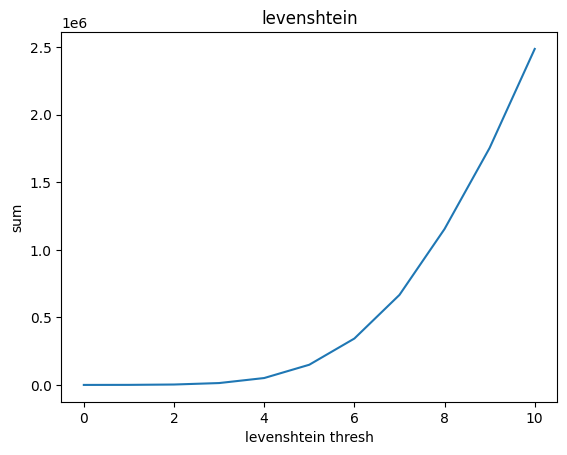

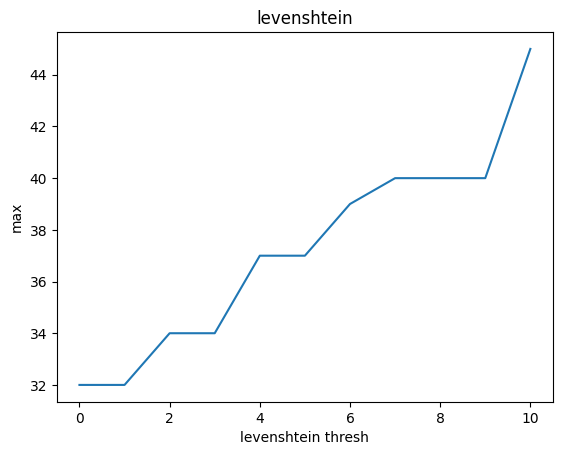

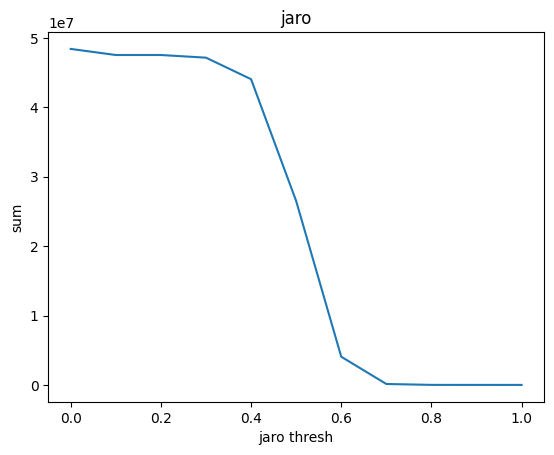

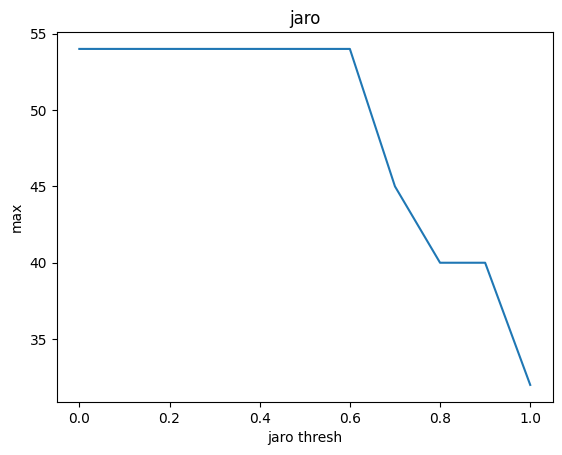

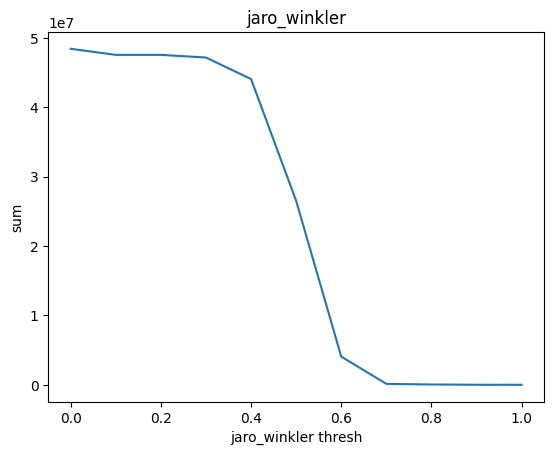

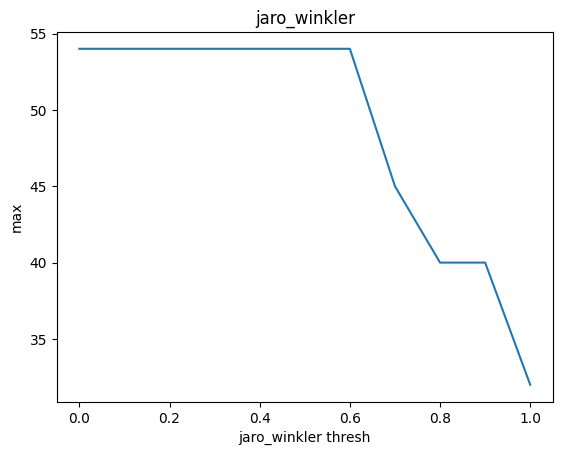

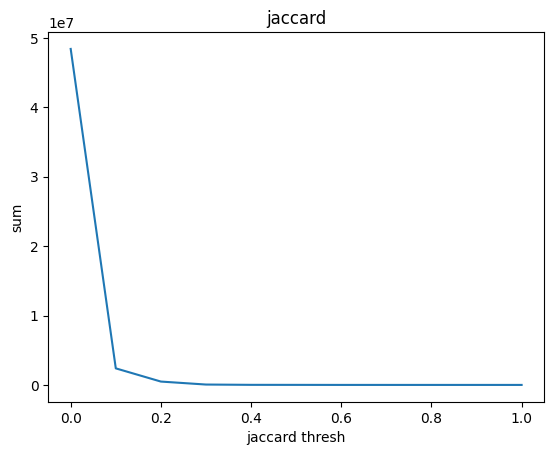

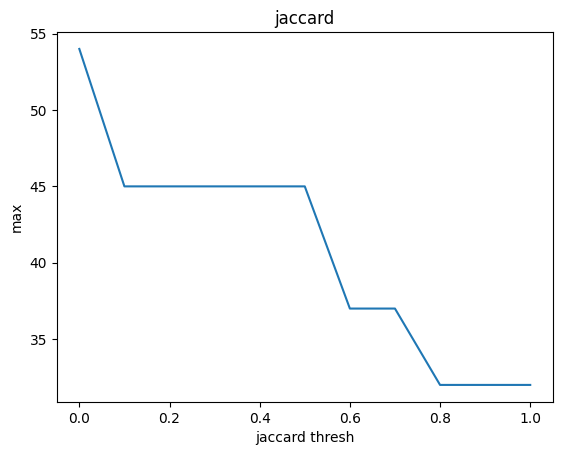

In [23]:
for method in methods:
    if method == 'levenshtein':
      x = range(11)
    else:
      x = [0.1*i for i in range(11)]
    plt.plot(x, [data[i][method][0] for i in range(11)])
    plt.xlabel(method+' thresh')
    plt.ylabel('sum')
    plt.title(method)
    plt.show()
    plt.plot(x, [data[i][method][1] for i in range(11)])
    plt.xlabel(method+' thresh')
    plt.ylabel('max')
    plt.title(method)
    plt.show()